In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
# from ssapy import ssa
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense

# Sample dataset
data = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRymrAiXlEk--FQLFiVWhOVWPfuTqrhq-OeAzBg3YIXS_nQ_psx7NWzGgABR5MZOT9iZ1PplXWkX33J/pub?gid=722074769&single=true&output=csv')


df = pd.DataFrame(data)
df.info()

# Splitting the data into training and testing sets


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    127 non-null    object 
 1   kwh     127 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.1+ KB


In [5]:
# LSTM (Long Short-Term Memory
def predict_lstm(train_data, test_data):
    model = Sequential()
    model.add(LSTM(100, activation='relu', input_shape=(1, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    X_train = np.reshape(train_data['kwh'].values, (len(train_data), 1, 1))
    y_train = train_data['kwh'].values
    model.fit(X_train, y_train, epochs=100, verbose=0)

    X_test = np.reshape(test_data['kwh'].values, (len(test_data), 1, 1))
    predictions = model.predict(X_test)

    return predictions.flatten()

In [6]:
# SARIMA (Seasonal AutoRegressive Integrated Moving Average)
def predict_sarima(train_data, test_data):
    model = SARIMAX(train_data['kwh'], order=(15, 1, 1), seasonal_order=(1, 1, 1, 30))
    results = model.fit(disp=False)
    predictions = results.get_forecast(steps=30).predicted_mean
    return predictions.values


In [7]:
# ARIMA (AutoRegressive Integrated Moving Average)
def predict_arima(train_data, test_data):
    model = ARIMA(train_data['kwh'], order=(2, 0, 2 ))
    results = model.fit()
    predictions = results.get_forecast(steps=30).predicted_mean
    return predictions.values

In [8]:
# GRU (Gated Recurrent Unit)
def predict_gru(train_data, test_data):
    model = Sequential()
    model.add(GRU(100, activation='relu', input_shape=(1, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    X_train = np.reshape(train_data['kwh'].values, (len(train_data), 1, 1))
    y_train = train_data['kwh'].values
    model.fit(X_train, y_train, epochs=100, verbose=0)

    X_test = np.reshape(test_data['kwh'].values, (len(test_data), 1, 1))
    predictions = model.predict(X_test)

    return predictions.flatten()

In [9]:
# Evaluation function
def evaluate(predictions, true_values):
    mse = mean_squared_error(true_values, predictions)
    r2 = r2_score(true_values, predictions)
    return mse, r2

In [10]:
# Predictions
train_data = df[30:]
test_data = df.head(30)
#ssa_predictions = predict_ssa(train_data, test_data)
lstm_predictions = predict_lstm(train_data, test_data)
sarima_predictions = predict_sarima(train_data, test_data)
arima_predictions = predict_arima(train_data, test_data)
gru_predictions = predict_gru(train_data, test_data)


1/1 [==============================] - 0s 208ms/step


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive par

1/1 [==============================] - 0s 186ms/step


In [11]:
print("LSTM PREDIC :" , lstm_predictions)
print("Sarima PREDIC :" , sarima_predictions)
print("Arima PREDIC :" , arima_predictions)
print("GRU PREDIC :" , gru_predictions)
true_values = test_data['kwh'].values
print('test values: ' ,test_data['kwh'] )
table_data = {
    'Model': ['LSTM', 'SARIMA', 'ARIMA', 'GRU'],
    'MSE': [],
    'R2 Score': []
}

models = [lstm_predictions, sarima_predictions, arima_predictions, gru_predictions, ]

for i, model in enumerate(models):
    mse, r2 = evaluate(model, true_values)
    table_data['MSE'].append(mse)
    table_data['R2 Score'].append(r2)

# Displaying the table
result_table = pd.DataFrame(table_data)
print(result_table)


LSTM PREDIC : [0.36702994 0.41964167 0.36400414 0.87270087 0.83528566 0.82512844
 0.52844423 0.38107407 0.5920072  0.5631094  0.6197199  0.36656404
 0.36400414 0.369595   0.6788414  0.8733091  1.1553735  0.9929091
 0.9824106  1.0869547  0.6442584  1.1028305  1.1074774  1.0829996
 1.1124647  1.1476171  1.0816823  0.5866719  1.5283252  1.0991844 ]
Sarima PREDIC : [0.74468231 1.39568052 1.13448988 0.72518147 0.45020939 0.11605882
 0.58238089 0.64408228 1.33420227 1.33147643 1.1839019  1.04391118
 0.95369504 0.46721675 0.59884448 0.62691022 0.75591901 0.99007264
 0.80492287 1.02086523 0.70346867 0.98627574 1.16912795 0.80764121
 0.65213274 0.7000164  0.58456498 0.31116701 0.64851394 0.58305246]
Arima PREDIC : [0.77090839 0.87602175 1.0696512  0.9536431  1.01934511 0.9822283
 1.00319412 0.99135142 0.99804085 0.99426228 0.99639663 0.99519103
 0.99587202 0.99548736 0.99570464 0.9955819  0.99565123 0.99561207
 0.99563419 0.9956217  0.99562875 0.99562477 0.99562702 0.99562575
 0.99562647 0.9956

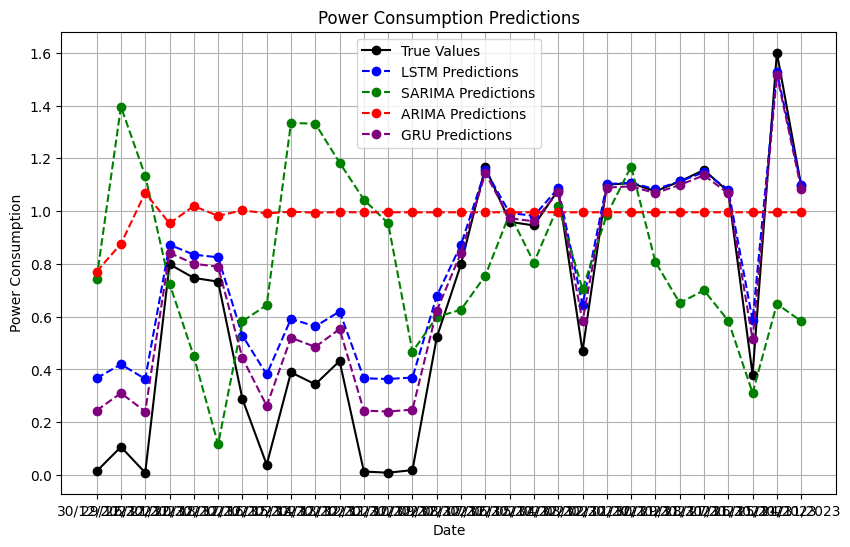

In [12]:
import matplotlib.pyplot as plt

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(test_data['Date'], true_values, label='True Values', marker='o', linestyle='-', color='black')
plt.plot(test_data['Date'], lstm_predictions, label='LSTM Predictions', marker='o', linestyle='--', color='blue')
plt.plot(test_data['Date'], sarima_predictions, label='SARIMA Predictions', marker='o', linestyle='--', color='green')
plt.plot(test_data['Date'], arima_predictions, label='ARIMA Predictions', marker='o', linestyle='--', color='red')
plt.plot(test_data['Date'], gru_predictions, label='GRU Predictions', marker='o', linestyle='--', color='purple')


plt.title('Power Consumption Predictions')
plt.xlabel('Date')
plt.ylabel('Power Consumption')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [14]:
# Load the dataset (assuming it's in a CSV file)
# Make sure the dataset has columns named 'date' and 'consumption'
dataset = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRymrAiXlEk--FQLFiVWhOVWPfuTqrhq-OeAzBg3YIXS_nQ_psx7NWzGgABR5MZOT9iZ1PplXWkX33J/pub?gid=722074769&single=true&output=csv',dayfirst=True)


In [15]:
# Preprocess the data
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset = dataset.set_index('Date')
# dataset = dataset.resample('D').sum().fillna(method='ffill')  # Resample to daily data and fill missing values


<ipython-input-15-edb4fdec94ac>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dataset['Date'] = pd.to_datetime(dataset['Date'])


In [16]:
# Normalize the data
scaler = MinMaxScaler()
dataset_scaled = scaler.fit_transform(dataset)
# dataset_scaled=dataset

In [17]:
# Prepare the data for LSTM
X, y = [], []
look_back = 30  # Number of days to look back
for i in range(len(dataset_scaled) - look_back):
    X.append(dataset_scaled[i:(i + look_back)])
    y.append(dataset_scaled[i + look_back])

X, y = np.array(X), np.array(y)

In [18]:
# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

X_train, X_test, y_train, y_test

(array([[[0.00306604],
         [0.05542453],
         [0.        ],
         ...,
         [0.21061321],
         [0.9009434 ],
         [0.61533019]],
 
        [[0.05542453],
         [0.        ],
         [0.44716981],
         ...,
         [0.9009434 ],
         [0.61533019],
         [0.56863208]],
 
        [[0.        ],
         [0.44716981],
         [0.41792453],
         ...,
         [0.61533019],
         [0.56863208],
         [0.68867925]],
 
        ...,
 
        [[0.73301887],
         [0.87382075],
         [0.51698113],
         ...,
         [0.62641509],
         [0.58962264],
         [0.58443396]],
 
        [[0.87382075],
         [0.51698113],
         [0.69551887],
         ...,
         [0.58962264],
         [0.58443396],
         [0.35966981]],
 
        [[0.51698113],
         [0.69551887],
         [0.69174528],
         ...,
         [0.58443396],
         [0.35966981],
         [0.60754717]]]),
 array([[[0.69551887],
         [0.69174528],
         

In [19]:
# Build the LSTM model
model = Sequential([
    LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)


Epoch 1/100
3/3 [==============================] - 2s 13ms/step - loss: 0.1924
Epoch 2/100
3/3 [==============================] - 0s 15ms/step - loss: 0.1113
Epoch 3/100
3/3 [==============================] - 0s 14ms/step - loss: 0.0594
Epoch 4/100
3/3 [==============================] - 0s 15ms/step - loss: 0.0635
Epoch 5/100
3/3 [==============================] - 0s 16ms/step - loss: 0.0650
Epoch 6/100
3/3 [==============================] - 0s 13ms/step - loss: 0.0537
Epoch 7/100
3/3 [==============================] - 0s 14ms/step - loss: 0.0539
Epoch 8/100
3/3 [==============================] - 0s 13ms/step - loss: 0.0563
Epoch 9/100
3/3 [==============================] - 0s 14ms/step - loss: 0.0567
Epoch 10/100
3/3 [==============================] - 0s 14ms/step - loss: 0.0542
Epoch 11/100
3/3 [==============================] - 0s 14ms/step - loss: 0.0526
Epoch 12/100
3/3 [==============================] - 0s 15ms/step - loss: 0.0518
Epoch 13/100
3/3 [==============================]

In [20]:
# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Train Loss: {train_loss:.4f}')
print(f'Test Loss: {test_loss:.4f}')

Train Loss: 0.0416
Test Loss: 0.0392


In [21]:
# Predict consumption for the next 30 days
last_30_days = dataset_scaled[-look_back:]  # Last 30 days of data
predictions = []


In [22]:
last_30_days

array([[0.35660377],
       [0.71674528],
       [0.62169811],
       [0.61273585],
       [0.62641509],
       [0.58962264],
       [0.58443396],
       [0.35966981],
       [0.60754717],
       [0.85330189],
       [0.8495283 ],
       [0.6759434 ],
       [0.49410377],
       [0.41179245],
       [0.4615566 ],
       [0.50070755],
       [0.18514151],
       [0.3509434 ],
       [0.59198113],
       [0.60283019],
       [0.21533019],
       [0.64740566],
       [0.68561321],
       [0.55      ],
       [0.47948113],
       [0.55400943],
       [0.51957547],
       [0.15424528],
       [0.50165094],
       [0.20778302]])

In [23]:
for _ in range(30):
    pred = model.predict(last_30_days.reshape(1, look_back, 1))
    predictions.append(pred)
    last_30_days = np.append(last_30_days[1:], pred, axis=0)

# Inverse transform the predictions
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Print the predictions
print("Predicted power consumption for the next 30 days:")
print(predictions)


1/1 [==============================] - 0s 22ms/step
Predicted power consumption for the next 30 days:
[[0.9243247]
 [1.0549624]
 [1.0958302]
 [1.098353 ]
 [1.0841563]
 [1.0660497]
 [1.0508872]
 [1.0408239]
 [1.0371294]
 [1.0358363]
 [1.0350521]
 [1.0351734]
 [1.0369158]
 [1.0401868]
 [1.0441025]
 [1.0475096]
 [1.0502199]
 [1.054389 ]
 [1.0574874]
 [1.0586845]
 [1.0592828]
 [1.0619626]
 [1.0624827]
 [1.062379 ]
 [1.0629617]
 [1.064141 ]
 [1.0650649]
 [1.0661471]
 [1.0692067]
 [1.0706481]]


In [24]:
mse = mean_squared_error(true_values, predictions)
r2 = r2_score(true_values, predictions)
mse,r2

(0.35666938342055016, -0.7259543662714796)